# Exploration

## Imports

In [1]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import output#oven timer

## Load Data

/content


False

### TensorFlow

In [5]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
   creating: Data/Test_Data/
  inflating: __MACOSX/Data/._Test_Data  
  inflating: Data/Validation_and_Test_Data.ipynb  
  inflating: __MACOSX/Data/._Validation_and_Test_Data.ipynb  
   creating: Data/Train_Data/
  inflating: __MACOSX/Data/._Train_Data  
   creating: Data/Validation_Data/
  inflating: __MACOSX/Data/._Validation_Data  
  inflating: Data/Train_Data_Augmentation_and_PreProcessing.ipynb  
  inflating: __MACOSX/Data/._Train_Data_Augmentation_and_PreProcessing.ipynb  
   creating: Data/.ipynb_checkpoints/
  inflating: __MACOSX/Data/._.ipynb_checkpoints  
   creating: Data/Test_Data/un_processed/
  inflating: __MACOSX/Data/Test_Data/._un_processed  
   creating: Data/Test_Data/pre_processed/
  inflating: __MACOSX/Data/Test_Data/._pre_processed  
   creating: Data/Train_Data/UnProcessed/
  inflating: __MACOSX/Data/Train_Data/._UnProcessed  
   creating: Data/Train_Data/pre_processed/
  inflating: __MAC

In [1]:
def reset_ids(df):
    df['id'] = range(1, len(df) + 1)
    return df

In [160]:

train_data_17k_unprocessed_path= "/content/train_data_unprocessed.csv"
train_data_17k_pre_lem_path = '/content/Data/Train_Data/pre_processed/train_data_lemmatized.csv'
train_data_17k_pre_lem_sw_path = "/content/Data/Train_Data/pre_processed/train_data_lemmatized_sw_removed.csv"
train_data_17k_pre_sw_path= "/content/Data/Train_Data/pre_processed/train_data_sw_removed.csv"



train_data_17k_unprocessed = pd.read_csv(train_data_17k_unprocessed_path, index_col=0)
train_data_17k_unprocessed.reset_index(inplace=True)


train_data_17k_unprocessed= reset_ids(train_data_17k_unprocessed)


train_data_unprocessed_unaugmented = train_data_17k_unprocessed.iloc[:4355]
train_data_17k_pre_lem_sw= pd.read_csv(train_data_17k_pre_lem_sw_path)
train_data_17k_pre_sw= pd.read_csv(train_data_17k_pre_sw_path)
train_data_17k_pre_lem= pd.read_csv(train_data_17k_pre_lem_path)



In [161]:
test_data_unprocessed_path= "Data/Test_Data/un_processed/test_data_filtered.csv"
test_data_pre_lem_sw_path = 'Data/Test_Data/pre_processed/test_data_lemmatized_sw_removed.csv'

test_data_unprocessed= pd.read_csv(test_data_unprocessed_path, index_col=0)
test_data_unprocessed= test_data_unprocessed.reset_index(drop=True)
test_data_pre_lem_sw= pd.read_csv(test_data_pre_lem_sw_path)


In [162]:
valid_data_unprocessed_path= "Data/Validation_Data/UnProcessed/validation_data_filtered.csv"
valid_data_pre_lem_path= "Data/Validation_Data/pre_processed/validation_data_lemmatized.csv"
valid_data_pre_lem_sw_path= "Data/Validation_Data/pre_processed/validation_data_lemmatized_sw_removed.csv"
valid_data_pre_sw_path="Data/Validation_Data/pre_processed/validation_data_sw_removed.csv"

valid_data_unprocessed=pd.read_csv(valid_data_unprocessed_path, index_col=0)
valid_data_pre_lem=pd.read_csv(valid_data_pre_lem_path, index_col=0)
valid_data_pre_lem_sw=pd.read_csv(valid_data_pre_lem_sw_path, index_col=0)
valid_data_pre_sw= pd.read_csv(valid_data_pre_sw_path, index_col=0)


In [165]:

def data_prep(df, text_name, label_name='file'):
    # Convert labels to numeric
    label_list = df[label_name].unique()
    label_dict = {label: idx for idx, label in enumerate(label_list)}
    df[label_name] = df[label_name].map(label_dict)

    # Create TensorFlow Dataset
    labels = tf.keras.utils.to_categorical(df[label_name].values)
    dataset = tf.data.Dataset.from_tensor_slices((df[text_name].values, labels))

    return dataset
def oven_timer():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')#Beep when complete, bread is baked


def print_dataset_details(dataset, num_examples=5):
    for text_batch, label_batch in dataset.take(num_examples):
        print("Text batch: ", text_batch.numpy())
        print("Label batch: ", label_batch.numpy())
        print("Shape of text batch: ", text_batch.shape)
        print("Shape of label batch: ", label_batch.shape)
        print("-----")


In [166]:
training_data_la_unp_unaug = data_prep(train_data_unprocessed_unaugmented,text_name = 'la')
training_data_en_unp_unaug = data_prep(train_data_unprocessed_unaugmented,text_name = 'en')




training_data_la_unp_aug = data_prep(train_data_17k_unprocessed,text_name = 'la')
training_data_en_unp_aug = data_prep(train_data_17k_unprocessed,text_name = 'en')

training_data_en_unp_aug.element_spec

training_data_la_lem_sw = data_prep(train_data_17k_pre_lem_sw,text_name = 'la')
training_data_en_lem_sw = data_prep(train_data_17k_pre_lem_sw,text_name = 'en')

training_data_en_unp_aug.element_spec



<ipython-input-165-de0d8a8e9865>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_name] = df[label_name].map(label_dict)
<ipython-input-165-de0d8a8e9865>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_name] = df[label_name].map(label_dict)


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(5,), dtype=tf.float32, name=None))

In [167]:
validation_data_la_unp_unaug = data_prep(valid_data_unprocessed,text_name = 'la')
validation_data_en_unp_unaug = data_prep(valid_data_unprocessed,text_name = 'en')

validation_data_la_unp_aug = data_prep(valid_data_unprocessed,text_name = 'la')
validation_data_en_unp_aug = data_prep(valid_data_unprocessed,text_name = 'en')

validation_data_la_lem_sw = data_prep(valid_data_pre_lem_sw,text_name = 'la')
validation_data_en_lem_sw = data_prep(valid_data_pre_lem_sw,text_name = 'en')



In [168]:
test_data_la_unp_unaug = data_prep(test_data_unprocessed,text_name = 'la')
test_data_en_unp_unaug = data_prep(test_data_unprocessed,text_name = 'en')

test_data_la_unp_aug = data_prep(test_data_unprocessed,text_name = 'la')
test_data_en_unp_aug = data_prep(test_data_unprocessed,text_name = 'en')



test_data_la_lem_sw = data_prep(test_data_pre_lem_sw, text_name='la')
test_data_en_lem_sw = data_prep(test_data_pre_lem_sw, text_name='en')


In [172]:
BUFFER_SIZE = 10000
BATCH_SIZE = 24
# Apply direct batching and prefetching to the datasets
training_data_la_unp_unaug = training_data_la_unp_unaug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
training_data_en_unp_unaug = training_data_en_unp_unaug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

training_data_la_unp_aug = training_data_la_unp_aug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
training_data_en_unp_aug = training_data_en_unp_aug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

training_data_la_lem_sw = training_data_la_lem_sw.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
training_data_en_lem_sw = training_data_en_lem_sw.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

validation_data_la_unp = validation_data_la_unp_aug.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data_la_unp = test_data_la_unp_aug.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

validation_data_en_unp = validation_data_en_unp_aug.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data_en_unp = test_data_en_unp_aug.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

validation_data_la_lem_sw= validation_data_la_lem_sw.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_data_en_lem_sw= validation_data_en_lem_sw.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data_la_lem_sw=test_data_la_lem_sw.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data_en_lem_sw=test_data_en_lem_sw.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [173]:
# Check the shape of the batches in one of the datasets
for text_batch, label_batch in training_data_la_unp_unaug.take(1):
    print("Shape of text batch:", text_batch.shape)
    print("Shape of label batch:", label_batch.shape)

Shape of text batch: (24,)
Shape of label batch: (24, 5)


##Vectorization

In [138]:
def flatten_text_data(text, label):
    return tf.reshape(text, [-1]), label

In [174]:
VOCAB_SIZE = 5000
encoder_la_unp_unaug = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder_la_unp_unaug.adapt(training_data_la_unp_unaug.map(lambda text, label: text))
#training_data_la_unp_unaug = training_data_la_unp_unaug.map(flatten_text_data)


encoder_en_unp_unaug = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder_en_unp_unaug.adapt(training_data_en_unp_unaug.map(lambda text, label: text))
#training_data_en_unp_unaug = training_data_en_unp_unaug.map(flatten_text_data)


encoder_la_unp_aug = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder_la_unp_aug.adapt(training_data_la_unp_aug.map(lambda text, label: text))
#training_data_la_unp_aug = training_data_la_unp_aug.map(flatten_text_data)


encoder_en_unp_aug = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder_en_unp_aug.adapt(training_data_en_unp_aug.map(lambda text, label: text))
#training_data_en_unp_aug = training_data_en_unp_aug.map(flatten_text_data)

encoder_la_lem_sw = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder_la_lem_sw.adapt(training_data_la_lem_sw.map(lambda text, label: text))
#training_data_la_lem_sw = training_data_la_lem_sw.map(flatten_text_data)


encoder_en_lem_sw = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder_en_lem_sw.adapt(training_data_en_lem_sw.map(lambda text, label: text))
#training_data_en_lem_sw = training_data_en_lem_sw.map(flatten_text_data)



In [175]:
vocab = encoder_la_unp_unaug.get_vocabulary()
print("First 20 vocabularies:", vocab[:20])  # Print first 20 vocabularies


First 20 vocabularies: ['', '[UNK]', 'et', 'in', 'est', 'non', 'cum', 'ad', 'qui', 'ut', 'quam', 'de', 'si', 'quod', 'quae', 'sed', 'aut', 'ex', 'a', 'eius']


In [176]:
sample_texts = ["Sample text 1", "Another example text"]
vectorized_texts = encoder_la_unp_unaug(sample_texts)

print("Vectorized texts:", vectorized_texts.numpy())

Vectorized texts: [[1 1 1]
 [1 1 1]]


In [177]:
for text_batch, _ in training_data_la_lem_sw.take(1):
    print("Example text batch:", text_batch)

Example text batch: tf.Tensor(
[b'Sed consul, is res bene evenit, alius oppidum pergit, paucus repugno Numida capit, multus <deserta> propter Capsenses miseria ignis corrumpit; luctus caedes omnis conplentur.'
 b'Haec dies antequam valles effundit.'
 b'Et febris habebit, do vinum ater bibat; cito sanus fiet.'
 b'Deditque Dominus Caleb, aetate, continued Mecca sementis possessio'
 b'Hoc violentus exemplum.'
 b'dico quomodo pono tu filius tribuo tu terra desiderabilis hereditas praeclarus exercitus gens dico pater voco ego ego ingredior cesso'
 b'Ex imber villa aspicio quis accidit.'
 b'Primum deputato, bini gemma amplus relinquito.'
 b'Non multus tempus civilis Cesaris Augustus; Nec lego legitur, lego homo principio.'
 b'Michol filia Saul filius usque dies mors suus'
 b'postquam loquor sum praecipio Raguhel occido aries paro convivium cum horto is discumbo prandeo'
 b'De sophia amor is philosophia vocito est, prophetia affectatio is poetice vaticinatio deputavit.'
 b'Tobias manduco bibo

In [178]:
for text_batch, _ in training_data_la_lem_sw.take(1):
    print("Pre-Processed Data - Text batch shape:", text_batch.shape)
    print("Pre-Processed Data - Example text batch:", text_batch.numpy()[:3])

for text_batch, _ in training_data_la_unp_unaug.take(1):
    print("Pre-Processed Data - Text batch shape:", text_batch.shape)
    print("Pre-Processed Data - Example text batch:", text_batch.numpy()[:3])





Pre-Processed Data - Text batch shape: (24,)
Pre-Processed Data - Example text batch: [b'In insulis.' b'LXIX. Dolia olearius novo inbuito.'
 b'Nam oleum qui multus of vicus Amur\xc3\xa7a fringk sum quantus tua.']
Pre-Processed Data - Text batch shape: (24,)
Pre-Processed Data - Example text batch: [b'Id unum nefarie ab Opimio proditum, quod capitis non dicam Gracchi, sed civis Romani pretium se daturum idque auro repensurum proposuit.'
 b'haec illo loquente ad eos ecce princeps unus accessit et adorabat eum dicens filia mea modo defuncta est sed veni inpone manum super eam et vivet'
 b'Quae mihi lubet confiteri, Quirites ; nam ex parente meo et ex aliis sanctis viris ita accepi: munditias mulieribus, laborem viris convenire, omnibusque bonis oportere plus gloriae quam divitiarum esse; arma, non supellectilem decori esse.']


#Compose Layers

##Latin


 sequential model is used here since all the layers in the model only have single input and produce single output.

In [194]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.regularizers import l1_l2

def create_model(encoder, num_outputs=5, weight_decay=0.0001, l1_lambda=0.001):
    regularizer = l1_l2(l1=l1_lambda, l2=weight_decay)

    model = Sequential([
        encoder,
        Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=64,
            mask_zero=True),
        Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=regularizer)),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dense(num_outputs, activation='softmax', kernel_regularizer=regularizer)
    ])

    return model

Shape of text batch: (24,)
Shape of label batch: (24, 5)
Epoch 1/8
182/182 [==============================] - 24s 86ms/step - loss: 4.5589 - accuracy: 0.2342 - val_loss: 4.4876 - val_accuracy: 0.1102
Epoch 2/8
182/182 [==============================] - 7s 39ms/step - loss: 4.4099 - accuracy: 0.2866 - val_loss: 4.3449 - val_accuracy: 0.0826
Epoch 3/8
182/182 [==============================] - 5s 28ms/step - loss: 4.2650 - accuracy: 0.3125 - val_loss: 4.2081 - val_accuracy: 0.0413
Epoch 4/8
182/182 [==============================] - 6s 32ms/step - loss: 4.1242 - accuracy: 0.3490 - val_loss: 4.0752 - val_accuracy: 0.0386
Epoch 5/8
182/182 [==============================] - 4s 20ms/step - loss: 3.9872 - accuracy: 0.3458 - val_loss: 3.9514 - val_accuracy: 0.0386
Epoch 6/8
182/182 [==============================] - 4s 21ms/step - loss: 3.8528 - accuracy: 0.3339 - val_loss: 3.8432 - val_accuracy: 0.0331
Epoch 7/8
182/182 [==============================] - 4s 20ms/step - loss: 3.6958 - accurac

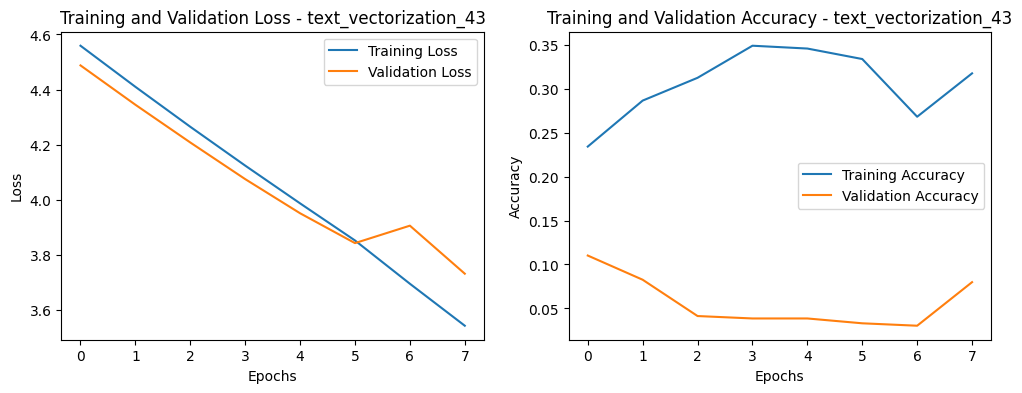

15/15 [==============================] - 0s 6ms/step - loss: 3.5987 - accuracy: 0.2778
Test Accuracy for 0: 0.2777777910232544
Shape of text batch: (24,)
Shape of label batch: (24, 5)
Epoch 1/8
723/723 [==============================] - 38s 40ms/step - loss: 4.3425 - accuracy: 0.2759 - val_loss: 4.0799 - val_accuracy: 0.0220
Epoch 2/8
723/723 [==============================] - 15s 20ms/step - loss: 3.7998 - accuracy: 0.2845 - val_loss: 3.6254 - val_accuracy: 0.0220
Epoch 3/8
723/723 [==============================] - 14s 19ms/step - loss: 3.2831 - accuracy: 0.2785 - val_loss: 3.4081 - val_accuracy: 0.0413
Epoch 4/8
723/723 [==============================] - 13s 18ms/step - loss: 2.8583 - accuracy: 0.3842 - val_loss: 2.9735 - val_accuracy: 0.0441
Epoch 5/8
723/723 [==============================] - 13s 18ms/step - loss: 2.5081 - accuracy: 0.4120 - val_loss: 2.6370 - val_accuracy: 0.0331
Epoch 6/8
723/723 [==============================] - 14s 19ms/step - loss: 2.2212 - accuracy: 0.4220 

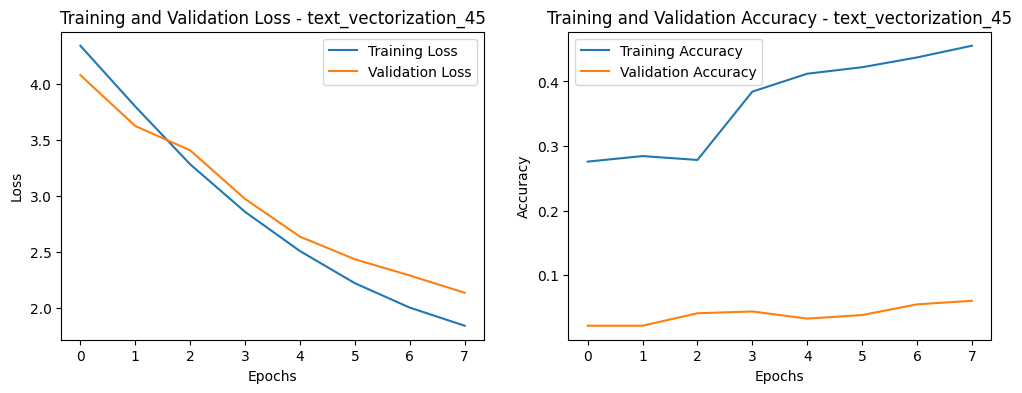

15/15 [==============================] - 0s 7ms/step - loss: 1.7747 - accuracy: 0.7667
Test Accuracy for 1: 0.7666666507720947
Shape of text batch: (24,)
Shape of label batch: (24, 5)
Epoch 1/8
723/723 [==============================] - 37s 40ms/step - loss: 4.3471 - accuracy: 0.2807 - val_loss: 4.0673 - val_accuracy: 0.1598
Epoch 2/8
723/723 [==============================] - 13s 18ms/step - loss: 3.8039 - accuracy: 0.4123 - val_loss: 3.5631 - val_accuracy: 0.0771
Epoch 3/8
723/723 [==============================] - 13s 18ms/step - loss: 3.2889 - accuracy: 0.3833 - val_loss: 3.2612 - val_accuracy: 0.0441
Epoch 4/8
723/723 [==============================] - 12s 17ms/step - loss: 2.8493 - accuracy: 0.3746 - val_loss: 2.9376 - val_accuracy: 0.0441
Epoch 5/8
723/723 [==============================] - 12s 16ms/step - loss: 2.4739 - accuracy: 0.3933 - val_loss: 2.6953 - val_accuracy: 0.0468
Epoch 6/8
723/723 [==============================] - 13s 17ms/step - loss: 2.1586 - accuracy: 0.4071 

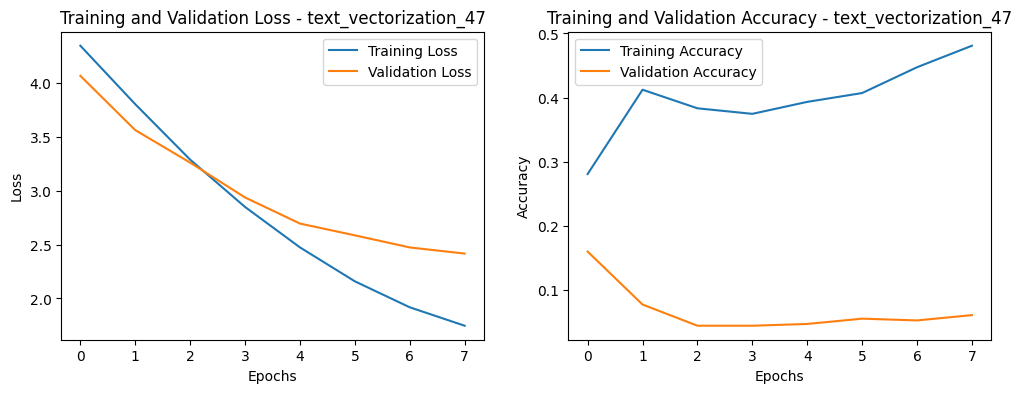

16/16 [==============================] - 0s 6ms/step - loss: 1.4916 - accuracy: 0.7431
Test Accuracy for 2: 0.7430939078330994


In [195]:
import matplotlib.pyplot as plt
import gc

encoders_la = [encoder_la_unp_unaug, encoder_la_unp_aug, encoder_la_lem_sw]

datasets_la = {
    encoder_la_unp_unaug: (training_data_la_unp_unaug, validation_data_la_unp, test_data_la_unp),
    encoder_la_unp_aug: (training_data_la_unp_aug, validation_data_la_unp, test_data_la_unp),
    encoder_la_lem_sw: (training_data_la_lem_sw, validation_data_la_lem_sw, test_data_la_lem_sw),
}

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=2,          # Stop after 2 epochs with no improvement
    restore_best_weights=False  # Do not restore best weights
)

test_results_la = {}
i = 0

for encoder in encoders_la:
    training_data, validation_data, test_data = datasets_la[encoder]

    for text_batch, label_batch in training_data.take(1):
     print(f"Shape of text batch: {text_batch.shape}")
     print(f"Shape of label batch: {label_batch.shape}")

    model = create_model(encoder)
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  optimizer=tf.keras.optimizers.Adam(2e-5),metrics=['accuracy']
                  )

    history = model.fit(
        training_data,
        epochs=8,
        validation_data=validation_data,
        callbacks=[early_stopping]
    )

    # Plotting test loss and validation loss vs epoch
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss - {encoder.name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy - {encoder.name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    oven_timer()  # Assuming this is a custom function

    test_loss, test_acc = model.evaluate(test_data)
    test_results_la[i] = {'loss': test_loss, 'accuracy': test_acc}
    print(f'Test Accuracy for {i}: {test_acc}')
    i += 1
    del model
    gc.collect()


## English

Shape of text batch: (24,)
Shape of label batch: (24, 5)
Epoch 1/8
182/182 [==============================] - 26s 94ms/step - loss: 4.5759 - accuracy: 0.2411 - val_loss: 4.5044 - val_accuracy: 0.0964
Epoch 2/8
182/182 [==============================] - 8s 47ms/step - loss: 4.4273 - accuracy: 0.2765 - val_loss: 4.3596 - val_accuracy: 0.0579
Epoch 3/8
182/182 [==============================] - 6s 36ms/step - loss: 4.2827 - accuracy: 0.2843 - val_loss: 4.2184 - val_accuracy: 0.0468
Epoch 4/8
182/182 [==============================] - 6s 33ms/step - loss: 4.1419 - accuracy: 0.3063 - val_loss: 4.0819 - val_accuracy: 0.0275
Epoch 5/8
182/182 [==============================] - 4s 24ms/step - loss: 4.0050 - accuracy: 0.2964 - val_loss: 3.9501 - val_accuracy: 0.0275
Epoch 6/8
182/182 [==============================] - 4s 24ms/step - loss: 3.8716 - accuracy: 0.2856 - val_loss: 3.8238 - val_accuracy: 0.0275
Epoch 7/8
182/182 [==============================] - 6s 31ms/step - loss: 3.7403 - accurac

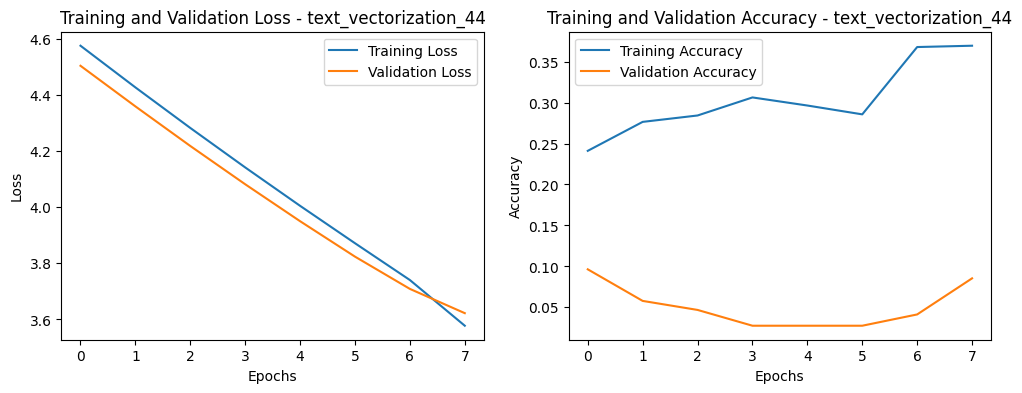

15/15 [==============================] - 0s 7ms/step - loss: 3.5284 - accuracy: 0.5778
Test Accuracy for 0: 0.5777778029441833
Shape of text batch: (24,)
Shape of label batch: (24, 5)
Epoch 1/8
723/723 [==============================] - 49s 55ms/step - loss: 4.3608 - accuracy: 0.2898 - val_loss: 4.0897 - val_accuracy: 0.0744
Epoch 2/8
723/723 [==============================] - 19s 26ms/step - loss: 3.8009 - accuracy: 0.3519 - val_loss: 3.7479 - val_accuracy: 0.0689
Epoch 3/8
723/723 [==============================] - 19s 26ms/step - loss: 3.1998 - accuracy: 0.4471 - val_loss: 3.2038 - val_accuracy: 0.0964
Epoch 4/8
723/723 [==============================] - 17s 24ms/step - loss: 2.7096 - accuracy: 0.4594 - val_loss: 2.8008 - val_accuracy: 0.1350
Epoch 5/8
723/723 [==============================] - 17s 24ms/step - loss: 2.3760 - accuracy: 0.5041 - val_loss: 2.5858 - val_accuracy: 0.1763
Epoch 6/8
723/723 [==============================] - 17s 23ms/step - loss: 2.1151 - accuracy: 0.5415 

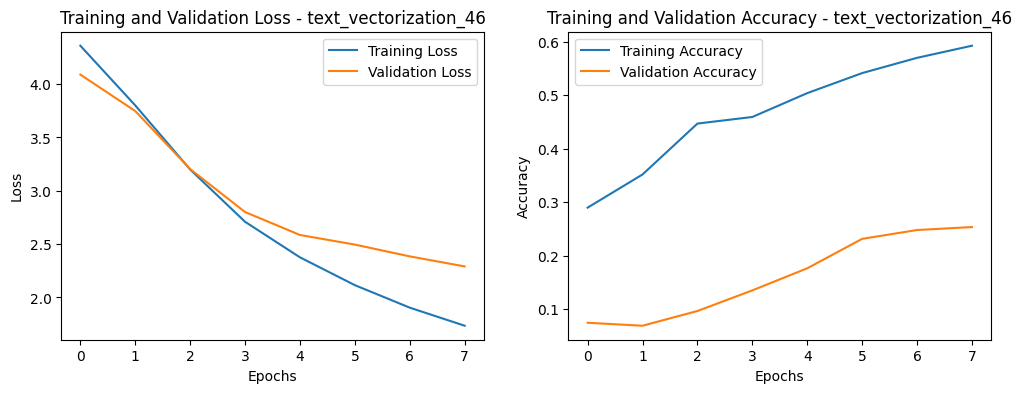

15/15 [==============================] - 0s 7ms/step - loss: 1.8261 - accuracy: 0.5472
Test Accuracy for 1: 0.5472221970558167
Shape of text batch: (24,)
Shape of label batch: (24, 5)
Epoch 1/8
723/723 [==============================] - 43s 47ms/step - loss: 4.3650 - accuracy: 0.2687 - val_loss: 4.0919 - val_accuracy: 0.0248
Epoch 2/8
723/723 [==============================] - 15s 21ms/step - loss: 3.7974 - accuracy: 0.3173 - val_loss: 3.7224 - val_accuracy: 0.0551
Epoch 3/8
723/723 [==============================] - 15s 20ms/step - loss: 3.2524 - accuracy: 0.3850 - val_loss: 3.1487 - val_accuracy: 0.7080
Epoch 4/8
723/723 [==============================] - 14s 19ms/step - loss: 2.7746 - accuracy: 0.4384 - val_loss: 2.7321 - val_accuracy: 0.7383
Epoch 5/8
723/723 [==============================] - 14s 19ms/step - loss: 2.3901 - accuracy: 0.4823 - val_loss: 2.5074 - val_accuracy: 0.6832
Epoch 6/8
723/723 [==============================] - 13s 19ms/step - loss: 2.1240 - accuracy: 0.5065 

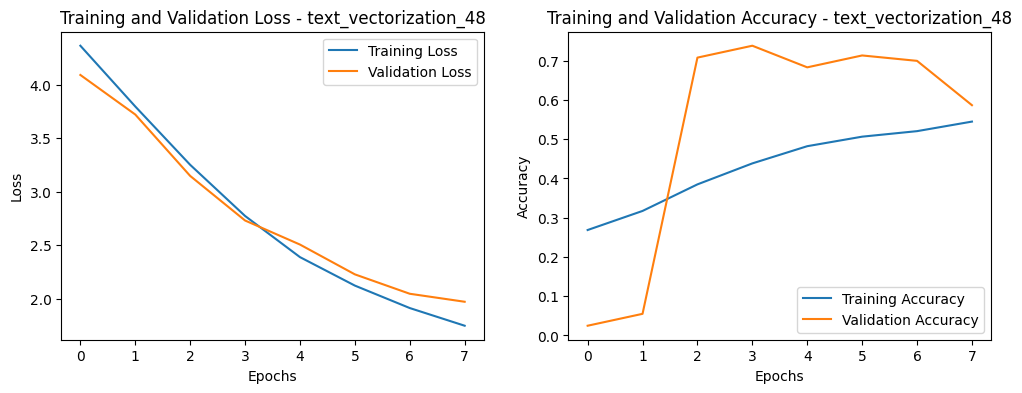

16/16 [==============================] - 0s 6ms/step - loss: 2.2710 - accuracy: 0.2403
Test Accuracy for 2: 0.2403314858675003


In [196]:

encoders_en = [encoder_en_unp_unaug, encoder_en_unp_aug, encoder_en_lem_sw]

datasets_en = {
    encoder_en_unp_unaug: (training_data_en_unp_unaug, validation_data_en_unp, test_data_en_unp),
    encoder_en_unp_aug: (training_data_en_unp_aug, validation_data_en_unp, test_data_en_unp),
    encoder_en_lem_sw: (training_data_en_lem_sw, validation_data_en_lem_sw, test_data_en_lem_sw),
}

test_results_en = {}
i=0


for encoder in encoders_en:
    training_data, validation_data, test_data = datasets_en[encoder]

    for text_batch, label_batch in training_data.take(1):
     print(f"Shape of text batch: {text_batch.shape}")
     print(f"Shape of label batch: {label_batch.shape}")

    model = create_model(encoder)
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  optimizer=tf.keras.optimizers.Adam(2e-5),metrics=['accuracy']
                  )

    history = model.fit(
        training_data,
        epochs=8,
        validation_data=validation_data,
        callbacks=[early_stopping]
    )

    # Plotting test loss and validation loss vs epoch
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss - {encoder.name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy - {encoder.name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    oven_timer()  # Assuming this is a custom function

    test_loss, test_acc = model.evaluate(test_data)
    test_results_en[i] = {'loss': test_loss, 'accuracy': test_acc}
    print(f'Test Accuracy for {i}: {test_acc}')
    i += 1
    del model
    gc.collect()

In [198]:
print(test_results_la)

{0: {'loss': 3.5986595153808594, 'accuracy': 0.2777777910232544}, 1: {'loss': 1.774708867073059, 'accuracy': 0.7666666507720947}, 2: {'loss': 1.4915599822998047, 'accuracy': 0.7430939078330994}}


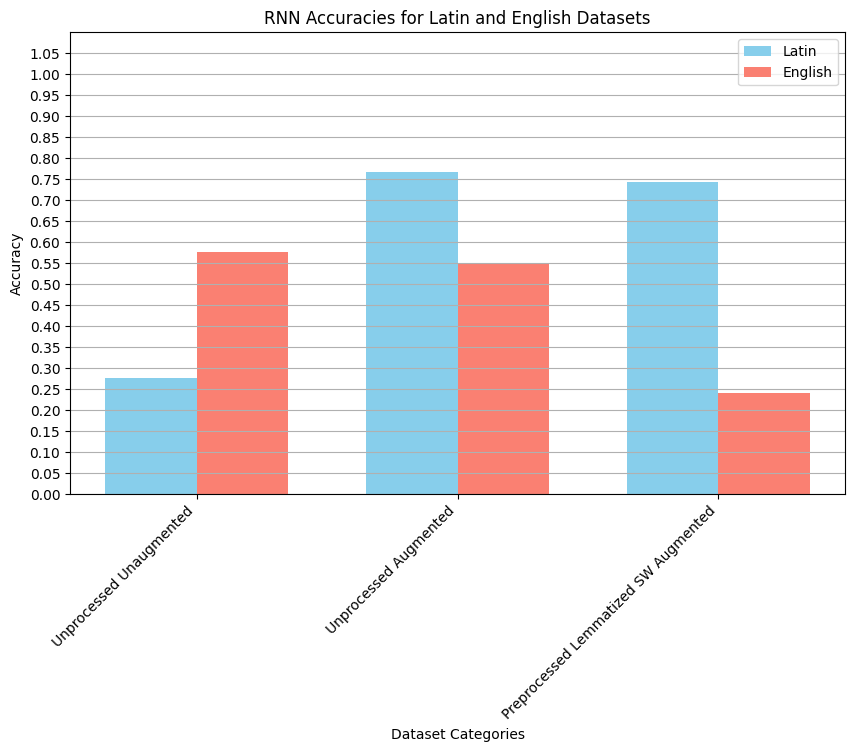

In [200]:
import matplotlib.pyplot as plt
import numpy as np
latin_labels = ['Unprocessed Unaugmented', 'Unprocessed Augmented', 'Preprocessed Lemmatized SW Augmented']
english_labels = ['Unprocessed Unaugmented', 'Unprocessed Augmented', 'Preprocessed Lemmatized SW Augmented']

latin_accuracies = [result['accuracy'] for result in test_results_la.values()]
english_accuracies = [result['accuracy'] for result in test_results_en.values()]


plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(latin_labels))

latin_bars = plt.bar(index, latin_accuracies, bar_width, label='Latin', color='skyblue')
english_bars = plt.bar([i + bar_width for i in index], english_accuracies, bar_width, label='English', color='salmon')

plt.xlabel('Dataset Categories')
plt.ylabel('Accuracy')
plt.title('RNN Accuracies for Latin and English Datasets')
plt.xticks([i + bar_width / 2 for i in index], latin_labels, rotation=45, ha="right")
plt.legend()
plt.yticks(np.arange(0, 1.1, 0.05))
plt.grid(axis='y')
plt.ylim(0, 1.1)
plt.show()